### 5. Read a grayscale image and perform the following operations:

        (b) Illustrate the segmentation based on gray levels.

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image = cv.imread('img6.tif', cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (512, 512))

### Generate Histogram

In [6]:
def generateHistogram(image):
    histogram = np.zeros(256)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1
    return histogram

### Multi-Threshold Segmentation

In [7]:
# Multi-Threshold Segmentation
threshold_values = [30, 90, 160]
segmented_image = np.zeros_like(image, dtype=np.uint8)

for i in range(len(threshold_values) + 1):

    lower_bound = 0 if i == 0 else threshold_values[i - 1]
    upper_bound = 255 if i == len(threshold_values) else threshold_values[i]

    mask = (image >= lower_bound) & (image <= upper_bound)

    segment_value = (i * 255) // len(threshold_values) if len(threshold_values) > 0 else 255
    
    segmented_image[mask] = segment_value



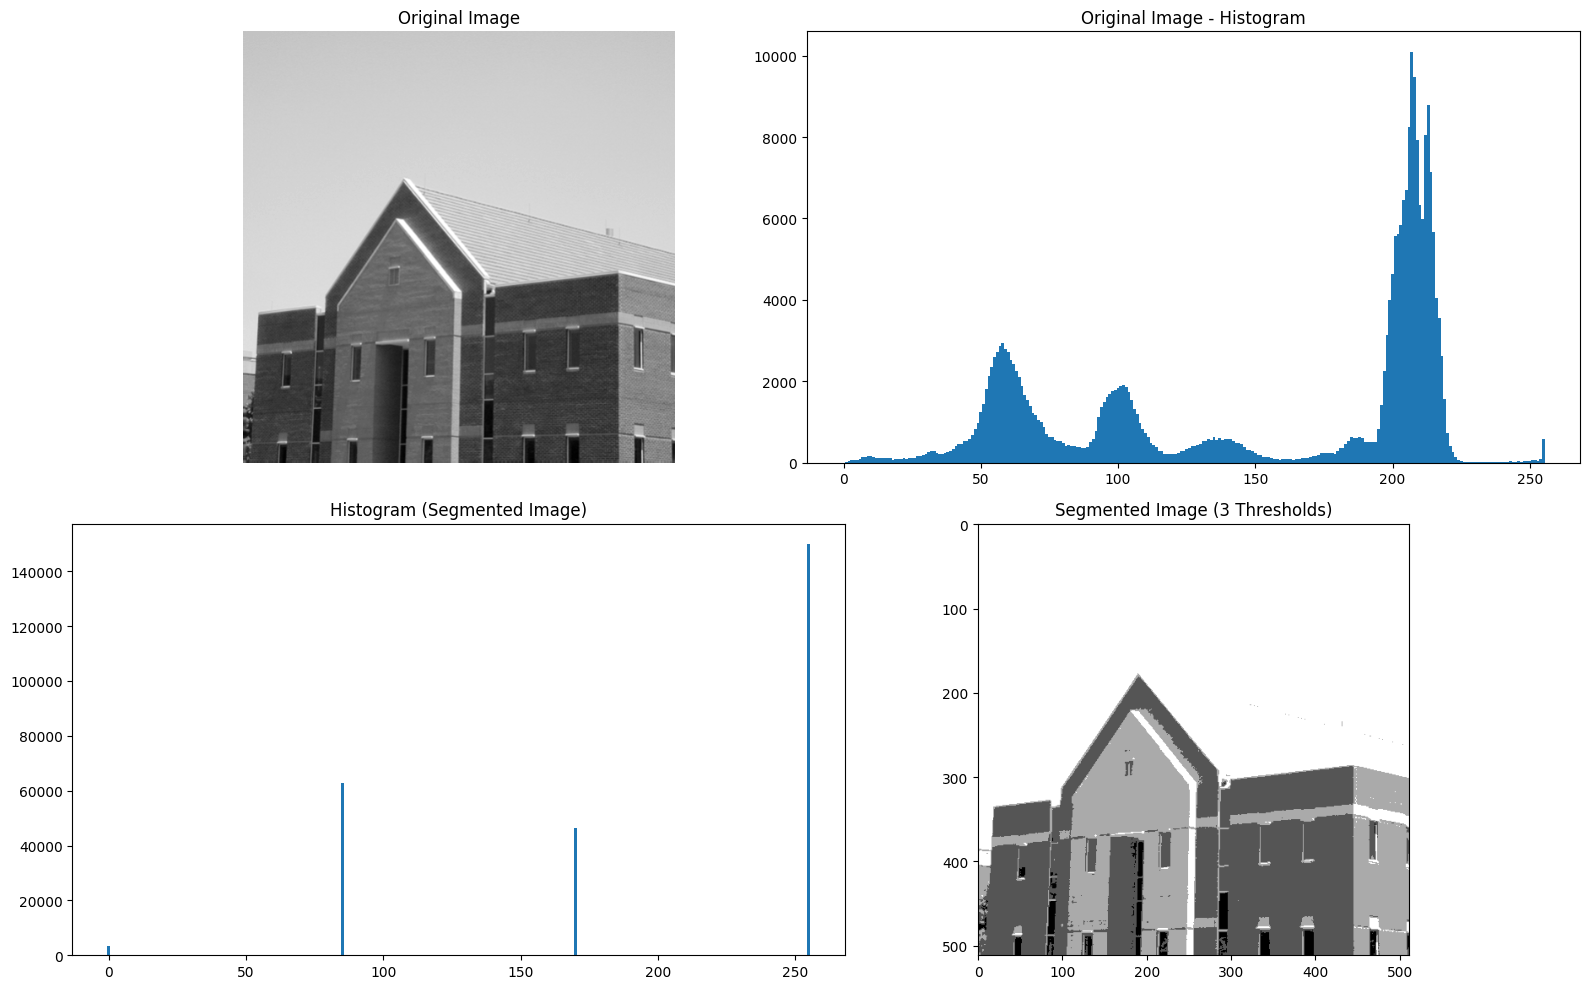

In [8]:
plt.figure(figsize=(16, 10))


plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')


hist = generateHistogram(image)
plt.subplot(2, 2, 2)
plt.bar(range(256), hist, width=1.0)
plt.title("Original Image - Histogram")


segmentedImageGrayLevelCount = generateHistogram(segmented_image)
plt.subplot(2, 2, 3)
plt.title(f"Histogram (Segmented Image)")
plt.bar(range(256), segmentedImageGrayLevelCount, width=1.0)

plt.subplot(2, 2, 4)
plt.title(f"Segmented Image (3 Thresholds)")
plt.imshow(segmented_image, cmap='gray')
plt.tight_layout()
plt.show()